In [1]:
# librairies

import xarray as xr
import numpy as np
import pandas as pd

In [21]:
# import data

chemin = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'

ds = xr.open_dataset(chemin)

In [22]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 2920)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-12-31T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [23]:
# test to average data on one day, 2 weeks before and 2 weeks after

day = '1990-01-21'
var = 'd2m'

ds_day = ds.sel(time=day)

In [36]:
# slice the dataset to only include Europe  71.5, -25, 34.4, 40.5,

ds_day_europe = ds_day.sel(latitude=slice(70, 30), longitude=slice(-10, 40))

# plot the data on a map using cartopy

In [83]:
# select 2 weeks before and 2 weeks after the day

week_before = pd.to_datetime(day) - pd.DateOffset(days=14)
week_after = pd.to_datetime(day) + pd.DateOffset(days=14)

ds_before = ds.sel(time=slice(week_before, day))
ds_after = ds.sel(time=slice(day, week_after))

ds_combined = xr.concat([ds_before, ds_after], dim='time')

# average data on each longitude and latitude coordinates

ds_combined = ds_combined.mean(dim='time')

ds_combined

# slice the ds_combined to only include Europe

rolled_lon = {'longitude':41, 'longitude':335}
ds_rolled = ds_combined.roll(rolled_lon, roll_coords=True)
ds_combined_europe = ds_rolled.sel(latitude=slice(71, 30), longitude=slice(335, 41))
'''ds_combined_europe_lon = ds_combined.sel(latitude=slice(71, 30), longitude=slice(335, 359.75))
ds_combined_europe = xr.concat([ds_combined_europe, ds_combined_europe_lon], dim='longitude')'''

ds_combined_europe

<xarray.Dataset>
Dimensions:    (longitude: 265, latitude: 165)
Coordinates:
  * longitude  (longitude) float32 335.0 335.2 335.5 335.8 ... 40.5 40.75 41.0
  * latitude   (latitude) float32 71.0 70.75 70.5 70.25 ... 30.5 30.25 30.0
Data variables:
    d2m        (latitude, longitude) float32 254.9 256.8 256.3 ... 273.1 273.3

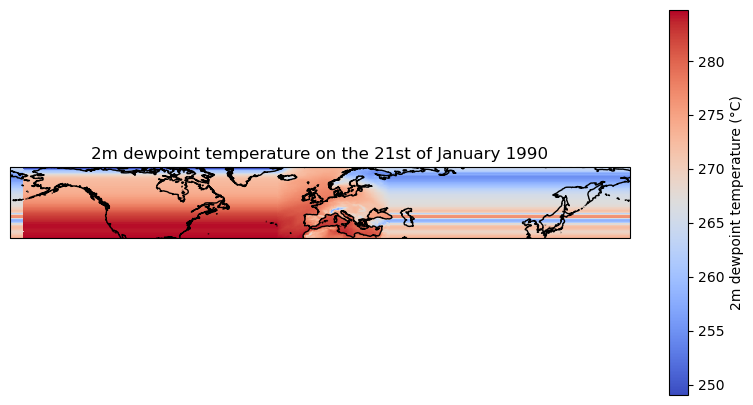

In [85]:
# plot the data on a map using cartopy

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ds_combined_europe_sorted = ds_combined_europe.sortby('longitude')

ds_combined_europe_sorted[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': '2m dewpoint temperature (°C)'})
ax.coastlines()
ax.set_title('2m dewpoint temperature on the 21st of January 1990')
plt.show()